# 数据分析-学生练习答案

## 1.互联网数据采集

### 1.1 获取网页 P84

In [7]:
import requests

url = "https://www.baidu.com/" #网址赋值
html = requests.get(url)       #用GET方法获取网页数据
html.encoding = "utf-8"        #设定网页编码方式：utf-8

print(html.text)  #输出结果

<!DOCTYPE html>
<!--STATUS OK--><html> <head><meta http-equiv=content-type content=text/html;charset=utf-8><meta http-equiv=X-UA-Compatible content=IE=Edge><meta content=always name=referrer><link rel=stylesheet type=text/css href=https://ss1.bdstatic.com/5eN1bjq8AAUYm2zgoY3K/r/www/cache/bdorz/baidu.min.css><title>百度一下，你就知道</title></head> <body link=#0000cc> <div id=wrapper> <div id=head> <div class=head_wrapper> <div class=s_form> <div class=s_form_wrapper> <div id=lg> <img hidefocus=true src=//www.baidu.com/img/bd_logo1.png width=270 height=129> </div> <form id=form name=f action=//www.baidu.com/s class=fm> <input type=hidden name=bdorz_come value=1> <input type=hidden name=ie value=utf-8> <input type=hidden name=f value=8> <input type=hidden name=rsv_bp value=1> <input type=hidden name=rsv_idx value=1> <input type=hidden name=tn value=baidu><span class="bg s_ipt_wr"><input id=kw name=wd class=s_ipt value maxlength=255 autocomplete=off autofocus=autofocus></span><span class="bg s_btn

### 1.2  网页解析 P85

beautifulsoup使用参考文档<br>
https://beautifulsoup.readthedocs.io/zh_CN/v4.4.0/index.html#id13

1. 网页排版整理

In [8]:
#整理网页
import requests
from bs4 import BeautifulSoup

url = "https://www.baidu.com"  #网址赋值
html = requests.get(url)       #用GET方法获取网页数据
html.encoding = "utf-8"        #设定网页编码方式：utf-8

#---------new code here--------
soup = BeautifulSoup(html.text,'html.parser')  #建立soup对象，获取网页源代码
print(soup.prettify())   #将网页源代码排版整理输出，以便观察相关结果

<!DOCTYPE html>
<!--STATUS OK-->
<html>
 <head>
  <meta content="text/html;charset=utf-8" http-equiv="content-type"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="always" name="referrer"/>
  <link href="https://ss1.bdstatic.com/5eN1bjq8AAUYm2zgoY3K/r/www/cache/bdorz/baidu.min.css" rel="stylesheet" type="text/css"/>
  <title>
   百度一下，你就知道
  </title>
 </head>
 <body link="#0000cc">
  <div id="wrapper">
   <div id="head">
    <div class="head_wrapper">
     <div class="s_form">
      <div class="s_form_wrapper">
       <div id="lg">
        <img height="129" hidefocus="true" src="//www.baidu.com/img/bd_logo1.png" width="270"/>
       </div>
       <form action="//www.baidu.com/s" class="fm" id="form" name="f">
        <input name="bdorz_come" type="hidden" value="1"/>
        <input name="ie" type="hidden" value="utf-8"/>
        <input name="f" type="hidden" value="8"/>
        <input name="rsv_bp" type="hidden" value="1"/>
        <input name="rsv_idx" type=

2. 抓取title属性

In [9]:
import requests
from bs4 import BeautifulSoup #新导入的库文件

url = "https://www.baidu.com"  #网址赋值
html = requests.get(url)       #用GET方法获取网页数据
html.encoding = "utf-8"        #设定网页编码方式：utf-8

soup = BeautifulSoup(html.text,'html.parser')  #建立soup对象，获取网页源代码

#---------new code here---------------------------------
#使用select方法，抓取相关属性
select_data =soup.select("title")    #这里我们选择title，你们可以根据结果修改别的标签进行查看     

print(select_data)   #输出抓取结果

[<title>百度一下，你就知道</title>]


### 1.3 数据存储 P85
注意：一定要先运行上面代码！！再运行本行代码！！！！

In [10]:
import time #导入时间库

'''前期数据准备、文件路径、数据预处理'''
file_path = './html_solve.txt'   #文件保存路径
localtime = time.asctime(time.localtime(time.time()))#加入时间戳
write_string = str(select_data) + localtime + '\n'

'''
write data 将数据写入文件
    mode = "a+" 模式:
    开一个文件用于读写。
    如果该文件已存在，文件指针将会放在文件的结尾。文件打开时会是追加模式。
    如果该文件不存在，创建新文件用于读写。
'''
with open(file_path,mode="a+") as file: 
    file.write(write_string)
    file.close
#end with

'''open file to check data'''
with open(file_path) as file_object:
    data = file_object.read()
    print(data)
#end with

[<script>document.write('<a href="http://www.baidu.com/bdorz/login.gif?login&tpl=mn&u='+ encodeURIComponent(window.location.href+ (window.location.search === "" ? "?" : "&")+ "bdorz_come=1")+ '" name="tj_login" class="lb">登录</a>');
                </script>]Wed Nov 30 22:54:37 2022
[<script>document.write('<a href="http://www.baidu.com/bdorz/login.gif?login&tpl=mn&u='+ encodeURIComponent(window.location.href+ (window.location.search === "" ? "?" : "&")+ "bdorz_come=1")+ '" name="tj_login" class="lb">登录</a>');
                </script>]Wed Nov 30 22:56:27 2022
[<title>百度一下，你就知道</title>]Wed Nov 30 22:57:41 2022
[<title>百度一下，你就知道</title>]Wed Dec 14 10:21:45 2022
[<title>百度一下，你就知道</title>]Wed Dec 14 11:29:36 2022
[<title>百度一下，你就知道</title>]Wed Dec 21 10:32:27 2022



## 2.数据导入

### 2.1 导入数据并检查数据完整度

In [11]:
import pandas as pd #导入pandas库

DataFilePath = "./bike_data.csv" #需要分析的数据文件路径

BikeDataFrame = pd.read_csv(DataFilePath,encoding='gb2312') #建立BikeDataFrame对象访问数据
BikeDataFrame.info() #显示数据基本信息
BikeDataFrame.head() #打印查看数据前5条信息具体内容

/var/folders/f7/r5q6zjwj0jz890wvb2prfl3m0000gn/T/ipykernel_46203/3402961264.py:5: DtypeWarning: Columns (8,9,10,11,13) have mixed types. Specify dtype option on import or set low_memory=False.
  BikeDataFrame = pd.read_csv(DataFilePath,encoding='gb2312') #建立BikeDataFrame对象访问数据


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1509922 entries, 0 to 1509921
Data columns (total 14 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   index       1509922 non-null  int64  
 1   bike_id     1509922 non-null  object 
 2   datetime    1509922 non-null  object 
 3   date        1509918 non-null  object 
 4   month       1509922 non-null  int64  
 5   season      1509922 non-null  object 
 6   workingday  1509922 non-null  object 
 7   localhost   1509922 non-null  object 
 8   weather     164591 non-null   object 
 9   isdaytime   164591 non-null   object 
 10  temp_value  164623 non-null   object 
 11  temp_unit   164589 non-null   object 
 12  wind_speed  164598 non-null   float64
 13  wind_unit   164593 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 161.3+ MB


,index,bike_id,datetime,date,month,season,workingday,localhost,weather,isdaytime,temp_value,temp_unit,wind_speed,wind_unit
0,769076,mr257,01:03:00,01月01日,1,Winter,Yes,吴泾医院,NaN,NaN,NaN,NaN,NaN,NaN
1,769077,mr2872,01:22:00,01月01日,1,Winter,Yes,马桥镇政府,NaN,NaN,NaN,NaN,NaN,NaN
2,769078,mr2113,01:22:00,01月01日,1,Winter,Yes,春申创意园,NaN,NaN,NaN,NaN,NaN,NaN
3,769083,mr672,01:28:00,01月01日,1,Winter,Yes,吴泾医院,NaN,NaN,NaN,NaN,NaN,NaN
4,769087,mr607,01:50:00,01月01日,1,Winter,Yes,体育公园,NaN,NaN,NaN,NaN,NaN,NaN


### 2.2 处理重复值 P88

In [12]:
BikeDataFrame.drop_duplicates(subset = ['bike_id','datetime','date'],  keep = 'first' , inplace = True)
BikeDataFrame.info()
BikeDataFrame.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1488664 entries, 0 to 1509921
Data columns (total 14 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   index       1488664 non-null  int64  
 1   bike_id     1488664 non-null  object 
 2   datetime    1488664 non-null  object 
 3   date        1488660 non-null  object 
 4   month       1488664 non-null  int64  
 5   season      1488664 non-null  object 
 6   workingday  1488664 non-null  object 
 7   localhost   1488664 non-null  object 
 8   weather     162426 non-null   object 
 9   isdaytime   162426 non-null   object 
 10  temp_value  162431 non-null   object 
 11  temp_unit   162424 non-null   object 
 12  wind_speed  162433 non-null   float64
 13  wind_unit   162428 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 170.4+ MB


,index,bike_id,datetime,date,month,season,workingday,localhost,weather,isdaytime,temp_value,temp_unit,wind_speed,wind_unit
0,769076,mr257,01:03:00,01月01日,1,Winter,Yes,吴泾医院,NaN,NaN,NaN,NaN,NaN,NaN
1,769077,mr2872,01:22:00,01月01日,1,Winter,Yes,马桥镇政府,NaN,NaN,NaN,NaN,NaN,NaN
2,769078,mr2113,01:22:00,01月01日,1,Winter,Yes,春申创意园,NaN,NaN,NaN,NaN,NaN,NaN
3,769083,mr672,01:28:00,01月01日,1,Winter,Yes,吴泾医院,NaN,NaN,NaN,NaN,NaN,NaN
4,769087,mr607,01:50:00,01月01日,1,Winter,Yes,体育公园,NaN,NaN,NaN,NaN,NaN,NaN


### 2.3 处理缺失值(Nan) P88

In [13]:
BikeDataFrame.dropna(axis = 0,inplace = True)
BikeDataFrame.info()
BikeDataFrame.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162424 entries, 120996 to 366423
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   index       162424 non-null  int64  
 1   bike_id     162424 non-null  object 
 2   datetime    162424 non-null  object 
 3   date        162424 non-null  object 
 4   month       162424 non-null  int64  
 5   season      162424 non-null  object 
 6   workingday  162424 non-null  object 
 7   localhost   162424 non-null  object 
 8   weather     162424 non-null  object 
 9   isdaytime   162424 non-null  object 
 10  temp_value  162424 non-null  object 
 11  temp_unit   162424 non-null  object 
 12  wind_speed  162424 non-null  float64
 13  wind_unit   162424 non-null  object 
dtypes: float64(1), int64(2), object(11)
memory usage: 18.6+ MB


,index,bike_id,datetime,date,month,season,workingday,localhost,weather,isdaytime,temp_value,temp_unit,wind_speed,wind_unit
120996,634310,mr200,00:00:00,07月01日,7,Summer,Yes,图书馆,Mostly cloudy,False,3.9,C,3.7,km/h
120997,634311,mr434,00:00:00,07月01日,7,Summer,Yes,图书馆,Mostly cloudy,False,5.0,C,3.7,km/h
120998,634312,mr5328,00:00:00,07月01日,7,Summer,Yes,图书馆,Mostly cloudy,False,3.9,C,3.7,km/h
120999,636456,mr77,00:00:00,07月01日,7,Summer,Yes,图书馆,Mostly cloudy,False,3.9,C,3.7,km/h
121000,636457,mr4507,00:00:00,07月01日,7,Summer,Yes,图书馆,Mostly cloudy,False,3.9,C,3.7,km/h


## 3.数据清洗

In [ ]:
import pandas as pd #导入pandas库

DataFilePath = "./bike_data.csv" #需要分析的数据文件路径

BikeDataFrame = pd.read_csv(DataFilePath,encoding='gb2312') #建立BikeDataFrame对象访问数据

#-----初步处理-------
BikeDataFrame.drop_duplicates(subset = ['bike_id','datetime','date'],  keep = 'first' , inplace = True) #删除重复的数据
BikeDataFrame.dropna(axis = 0,inplace = True) #删除空值数据

/var/folders/f7/r5q6zjwj0jz890wvb2prfl3m0000gn/T/ipykernel_59142/3638563951.py:5: DtypeWarning: Columns (8,9,10,11,13) have mixed types. Specify dtype option on import or set low_memory=False.
  BikeDataFrame = pd.read_csv(DataFilePath,encoding='gb2312') #建立BikeDataFrame对象访问数据


### 3.1 查看不符合条件的时间数据

In [ ]:
#获取不符合条件
BikeDataFrame[(BikeDataFrame['datetime']>='24:00:00')|(BikeDataFrame['datetime'].str.len()==7)]

,index,bike_id,datetime,date,month,season,workingday,localhost,weather,isdaytime,temp_value,temp_unit,wind_speed,wind_unit
126118,1149978,mr3767,24:01:00,07月01日,7,Summer,Yes,颛桥,Partly sunny,True,11.1,C,5.6,km/h
126119,1149979,mr176,24:02:00,07月01日,7,Summer,Yes,图书馆,Partly sunny,True,11.1,C,5.6,km/h
126120,1150198,mr850,24:02:00,07月01日,7,Summer,Yes,图书馆,Partly sunny,True,11.1,C,5.6,km/h
126121,1149980,mr945,24:03:00,07月01日,7,Summer,Yes,图书馆,Partly sunny,True,11.1,C,5.6,km/h
126122,1149981,mr3654,24:03:00,07月01日,7,Summer,Yes,颛桥,Partly sunny,True,11.1,C,5.6,km/h
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366418,516,mr97068,9:50:22,7月4日,6,Summer,Yes,青少年活动中心,sunny,True,18.7,C,3.7,km/h
366419,517,mr97070,9:50:22,7月5日,6,Summer,Yes,莘松中学,sunny,True,20,C,3.7,km/h
366420,518,mr97128,9:50:22,7月6日,6,Summer,Yes,莘庄镇政府,sunny,True,20,C,3.7,km/h
366421,519,mr96448,9:50:22,7月7日,6,Summer,Yes,麦多生活广场,sunny,True,18,C,3.7,km/h


### 3.2 处理不符合条件的时间数据（体验直接运行代码）
注意结果，多了一列`hour`数据

In [ ]:
#建立转换函数
def changeTime(datetime):
    datetime = datetime.rjust(8,'0') #右对齐数据  
    hour = int(datetime[:2])         #提取小时，转换整形
    if(hour >= 24):      #对符合条件的进行取余处理
        hour = hour % 24
        datetime = str(hour).rjust(2,'0')+datetime[2:]
    #end if
    return datetime,hour #返回处理好的时间数据，增加新的小时数据
#end changeTime

#通过apply功能调用上述处理功能函数，校准时间数据格式，同时增加‘hour’列数据
BikeDataFrame['datetime'],BikeDataFrame['hour'] = zip(*BikeDataFrame.datetime.apply(changeTime)) 

#-----显示处理后果-------
BikeDataFrame.info() #显示初步处理完的数据
BikeDataFrame.head(5) #打印前面5条查看数据具体样式

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162424 entries, 120996 to 366423
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   index       162424 non-null  int64  
 1   bike_id     162424 non-null  object 
 2   datetime    162424 non-null  object 
 3   date        162424 non-null  object 
 4   month       162424 non-null  int64  
 5   season      162424 non-null  object 
 6   workingday  162424 non-null  object 
 7   localhost   162424 non-null  object 
 8   weather     162424 non-null  object 
 9   isdaytime   162424 non-null  object 
 10  temp_value  162424 non-null  object 
 11  temp_unit   162424 non-null  object 
 12  wind_speed  162424 non-null  float64
 13  wind_unit   162424 non-null  object 
 14  hour        162424 non-null  int64  
dtypes: float64(1), int64(3), object(11)
memory usage: 19.8+ MB


,index,bike_id,datetime,date,month,season,workingday,localhost,weather,isdaytime,temp_value,temp_unit,wind_speed,wind_unit,hour
120996,634310,mr200,00:00:00,07月01日,7,Summer,Yes,图书馆,Mostly cloudy,False,3.9,C,3.7,km/h,0
120997,634311,mr434,00:00:00,07月01日,7,Summer,Yes,图书馆,Mostly cloudy,False,5.0,C,3.7,km/h,0
120998,634312,mr5328,00:00:00,07月01日,7,Summer,Yes,图书馆,Mostly cloudy,False,3.9,C,3.7,km/h,0
120999,636456,mr77,00:00:00,07月01日,7,Summer,Yes,图书馆,Mostly cloudy,False,3.9,C,3.7,km/h,0
121000,636457,mr4507,00:00:00,07月01日,7,Summer,Yes,图书馆,Mostly cloudy,False,3.9,C,3.7,km/h,0


### 3.3 查看包含'#VALUE!'数值的数据

In [ ]:
BikeDataFrame[BikeDataFrame['temp_value']=='#VALUE!']

,index,bike_id,datetime,date,month,season,workingday,localhost,weather,isdaytime,temp_value,temp_unit,wind_speed,wind_unit,hour
280369,613584,mr869,10:18:00,6月11日,6,Summer,No,上海市第五人民医院,Light rain,False,#VALUE!,C,11.1,km/h,10
280370,613585,mr2393,10:18:00,6月11日,6,Summer,No,上海市第五人民医院,Light rain,False,#VALUE!,C,24.1,km/h,10
280371,613586,mr4121,10:18:00,6月11日,6,Summer,No,颛桥,Light rain,False,#VALUE!,C,11.1,km/h,10
280372,613587,mr3159,10:18:00,6月11日,6,Summer,No,体育公园,Light rain,False,#VALUE!,C,24.1,km/h,10
280373,613588,mr5043,10:18:00,6月11日,6,Summer,No,莘庄,Light rain,False,#VALUE!,C,24.1,km/h,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364622,1111981,mr265,07:03:00,6月8日,6,Summer,Yes,马桥镇政府,Mostly cloudy,False,#VALUE!,C,5.6,km/h,7
364628,1111987,mr1486,07:06:00,6月8日,6,Summer,Yes,莘庄镇政府,Mostly cloudy,False,#VALUE!,C,5.6,km/h,7
364672,1112042,mr1440,07:22:00,6月8日,6,Summer,Yes,体育公园,Sunny,False,#VALUE!,C,5.6,km/h,7
364741,1112127,mr3504,07:53:00,6月8日,6,Summer,Yes,万达广场,Sunny,False,#VALUE!,C,5.6,km/h,7


### 3.4 删除包含'#VALUE!'数值的数据
对比3.2步骤处理完成后数据总量，

In [ ]:
#删除包含'#VALUE!'数值的数据-----------
BikeDataFrame.drop(BikeDataFrame[BikeDataFrame['temp_value']=='#VALUE!'].index,inplace=True)
#将'temp_value'类型转换为float
BikeDataFrame['temp_value'] = BikeDataFrame['temp_value'].astype('float')

#-----显示处理后果-------
BikeDataFrame.info() #显示初步处理完的数据
BikeDataFrame.head(5) #打印前面5条查看数据具体样式

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143163 entries, 120996 to 366423
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   index       143163 non-null  int64  
 1   bike_id     143163 non-null  object 
 2   datetime    143163 non-null  object 
 3   date        143163 non-null  object 
 4   month       143163 non-null  int64  
 5   season      143163 non-null  object 
 6   workingday  143163 non-null  object 
 7   localhost   143163 non-null  object 
 8   weather     143163 non-null  object 
 9   isdaytime   143163 non-null  object 
 10  temp_value  143163 non-null  float64
 11  temp_unit   143163 non-null  object 
 12  wind_speed  143163 non-null  float64
 13  wind_unit   143163 non-null  object 
 14  hour        143163 non-null  int64  
dtypes: float64(2), int64(3), object(10)
memory usage: 17.5+ MB


,index,bike_id,datetime,date,month,season,workingday,localhost,weather,isdaytime,temp_value,temp_unit,wind_speed,wind_unit,hour
120996,634310,mr200,00:00:00,07月01日,7,Summer,Yes,图书馆,Mostly cloudy,False,3.9,C,3.7,km/h,0
120997,634311,mr434,00:00:00,07月01日,7,Summer,Yes,图书馆,Mostly cloudy,False,5.0,C,3.7,km/h,0
120998,634312,mr5328,00:00:00,07月01日,7,Summer,Yes,图书馆,Mostly cloudy,False,3.9,C,3.7,km/h,0
120999,636456,mr77,00:00:00,07月01日,7,Summer,Yes,图书馆,Mostly cloudy,False,3.9,C,3.7,km/h,0
121000,636457,mr4507,00:00:00,07月01日,7,Summer,Yes,图书馆,Mostly cloudy,False,3.9,C,3.7,km/h,0


# 4.数据探索和可视化

## 4.1 共享单车四季租用数量占比

1. 导入数据

In [1]:
import pandas as pd #导入pandas库

DataFilePath = "./bike_data.csv" #需要分析的数据文件路径

BikeDataFrame = pd.read_csv(DataFilePath,encoding='gb2312') #建立BikeDataFrame对象访问数据

#-----初步处理-------
BikeDataFrame.drop_duplicates(subset = ['bike_id','datetime','date'],  keep = 'first' , inplace = True) #删除重复的数据

/var/folders/f7/r5q6zjwj0jz890wvb2prfl3m0000gn/T/ipykernel_35359/4277465874.py:5: DtypeWarning: Columns (8,9,10,11,13) have mixed types. Specify dtype option on import or set low_memory=False.
  BikeDataFrame = pd.read_csv(DataFilePath,encoding='gb2312') #建立BikeDataFrame对象访问数据


2. 显示图表

<AxesSubplot:title={'center':'共享单车四季租用数量占比图'}>

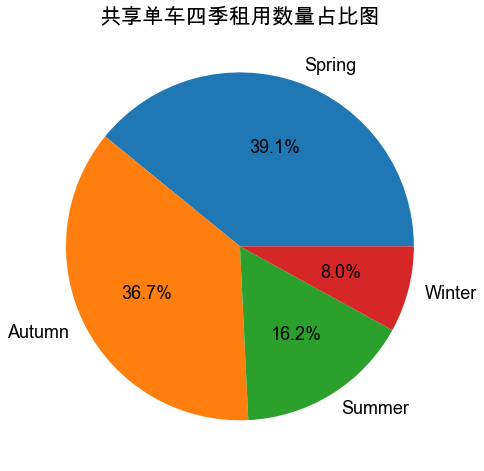

In [2]:
%run Font_Style.py

SeasonCount = BikeDataFrame['season'].value_counts()#选取season属性数据，同时进行计数
SeasonCount.plot.pie(title ="共享单车四季租用数量占比图",figsize=(8,8),autopct = '%1.1f%%',ylabel="")

## 4.2 不同天气情况下共享单车的租用数量

1. 导入数据

In [2]:
%run import_data_CleanUP.py
%run Font_Style.py

/var/folders/f7/r5q6zjwj0jz890wvb2prfl3m0000gn/T/ipykernel_85655/3272397496.py:5: DtypeWarning: Columns (8,9,10,11,13) have mixed types. Specify dtype option on import or set low_memory=False.
  BikeDataFrame = pd.read_csv(DataFilePath,encoding='gb2312') #建立BikeDataFrame对象访问数据


2. 显示图表

<AxesSubplot:title={'center':'不同天气下共享单车租赁数量对比'}, xlabel='weather', ylabel='amount'>

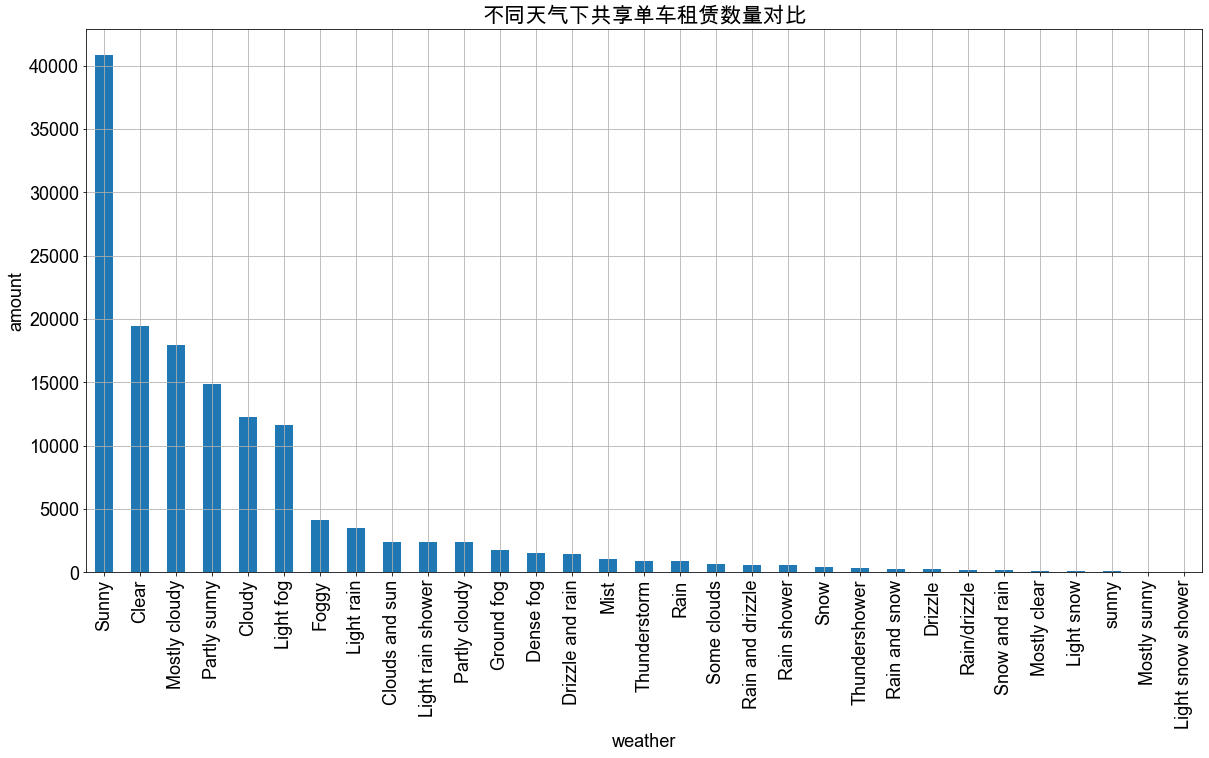

In [4]:
WeatherData = BikeDataFrame['weather'].value_counts() #统计不同天气情况下租赁的车辆
WeatherData.plot.bar(title ="不同天气下共享单车租赁数量对比",xlabel = "weather",ylabel = "amount",
                     figsize=(20,10),grid = True) #画柱状图

## 4.3 某一个月中温度对共享单车租用影响（以6月份数据为例）

1. 导入数据

In [ ]:
%run import_data_CleanUP.py
%run Font_Style.py

2. 查看是否有异常数据

/var/folders/f7/r5q6zjwj0jz890wvb2prfl3m0000gn/T/ipykernel_85655/1058258071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TempData['temp_value'] = TempData['temp_value'].apply(round) #整理温度数据，进行四舍五入


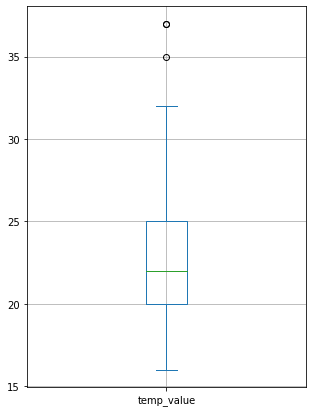

In [3]:
TempData = BikeDataFrame[BikeDataFrame['month'] == 6] #选取6月份数据。
TempData['temp_value'] = TempData['temp_value'].apply(round) #整理温度数据，进行四舍五入
TempData['temp_value'].plot.box(figsize=(5,7),grid = True) #调用一下箱图查看一下是否有异常数值

2. 显示温度数据 P107

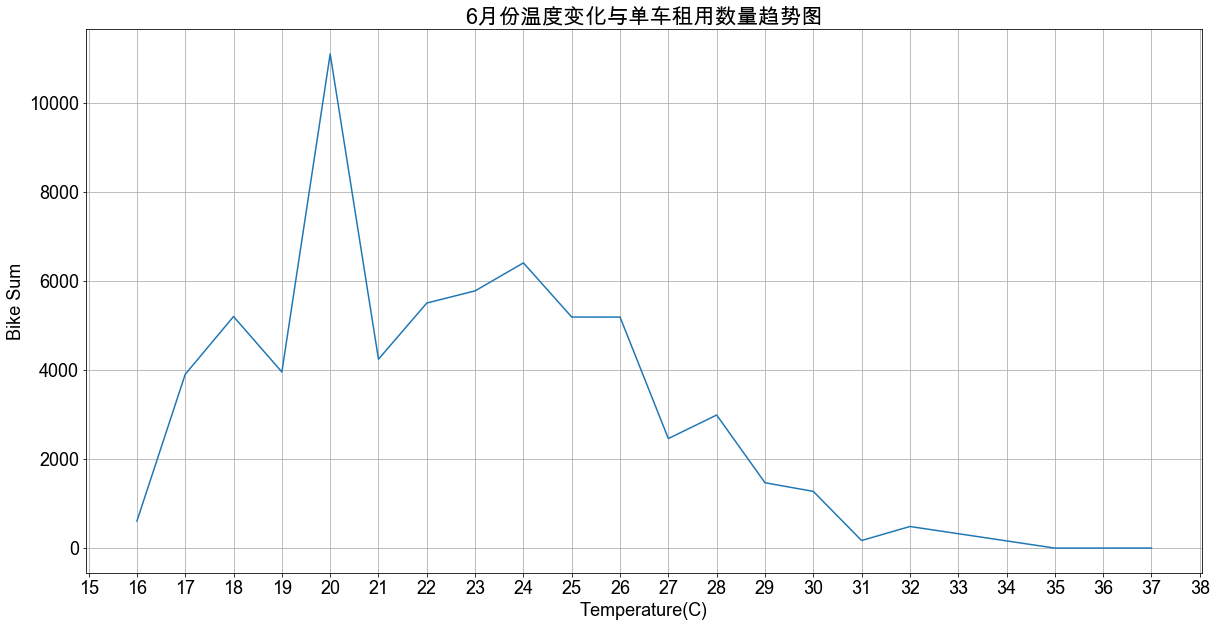

In [4]:
TempCount = TempData['temp_value'].value_counts().sort_index() #统计不同温度下租赁单车的数据,结果并按照温度排序
TempCount.plot(title="6月份温度变化与单车租用数量趋势图" ,xlabel = "Temperature(C)",ylabel = 'Bike Sum',
               figsize=(20,10),grid = True,xticks = range(15,39)) #将数据结果用折线图显示

## 4.4 某月每小时单车租用情况

1. 导入数据

In [ ]:
%run import_data_CleanUP.py
%run Font_Style.py

2. 显示时间数据

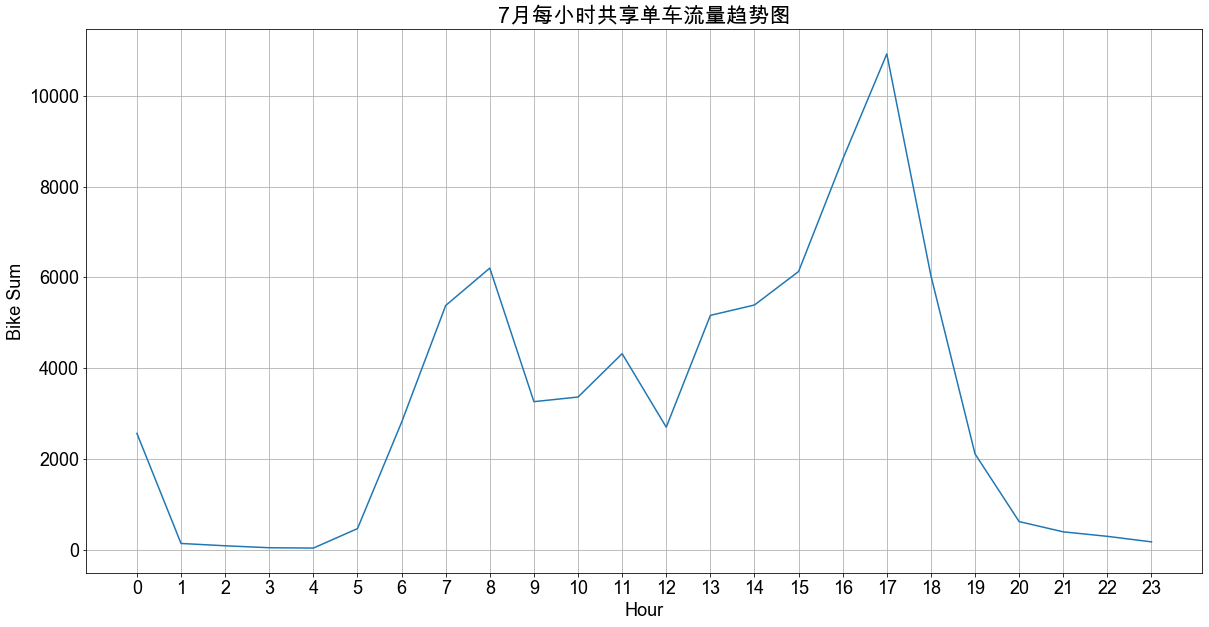

In [5]:
HourData = BikeDataFrame[BikeDataFrame['month'] == 7] #选取7月份数据。
HourCount = HourData['hour'].value_counts().sort_index()
HourCount.plot(title="7月每小时共享单车流量趋势图" ,xlabel = "Hour",ylabel = 'Bike Sum',
               figsize=(20,10),grid = True,xticks = range(0,24))